In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6) 

Populating the interactive namespace from numpy and matplotlib


In [0]:
df = pd.read_csv("train_clean.csv",dtype={"sexo":str, "ind_nuevo":str, "ult_fec_cli_1t":str, "indext":str}, nrows=7e6)

C:\Users\mia\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (6,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
print(df.head())

   Unnamed: 0  fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  \
0           0  2015-01-28   1375586            N              ES    H   35   
1           1  2015-01-28   1050611            N              ES    V   23   
2           2  2015-01-28   1050612            N              ES    V   23   
3           3  2015-01-28   1050613            N              ES    H   22   
4           4  2015-01-28   1050614            N              ES    V   23   

   fecha_alta ind_nuevo antiguedad  ...  ind_hip_fin_ult1 ind_plan_fin_ult1  \
0  2015-01-12       0.0          6  ...                 0                 0   
1  2012-08-10       0.0         35  ...                 0                 0   
2  2012-08-10       0.0         35  ...                 0                 0   
3  2012-08-10       0.0         35  ...                 0                 0   
4  2012-08-10       0.0         35  ...                 0                 0   

  ind_pres_fin_ult1 ind_reca_fin_ult1 ind_tjcr_fin_ult1 

In [0]:
df.isnull().sum()

Unnamed: 0                     0
fecha_dato                     0
ncodpers                       0
ind_empleado                4721
pais_residencia             4721
sexo                        4755
age                            0
fecha_alta                  4721
ind_nuevo                   4721
antiguedad                     0
indrel                      4721
indrel_1mes                81794
tiprel_1mes                81794
indresi                     4721
indext                      4721
canal_entrada              96032
indfall                     4721
tipodom                     4721
cod_prov                   41290
nomprov                    41290
ind_actividad_cliente       4721
renta                    1232965
segmento                   97077
ind_ahor_fin_ult1              0
ind_aval_fin_ult1              0
ind_cco_fin_ult1               0
ind_cder_fin_ult1              0
ind_cno_fin_ult1               0
ind_ctju_fin_ult1              0
ind_ctma_fin_ult1              0
ind_ctop_f

In [0]:
df.columns

Index(['Unnamed: 0', 'fecha_dato', 'ncodpers', 'ind_empleado',
       'pais_residencia', 'sexo', 'age', 'fecha_alta', 'ind_nuevo',
       'antiguedad', 'indrel', 'indrel_1mes', 'tiprel_1mes', 'indresi',
       'indext', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov', 'nomprov',
       'ind_actividad_cliente', 'renta', 'segmento', 'ind_ahor_fin_ult1',
       'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
       'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1',
       'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
       'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1',
       'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
       'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1',
       'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1',
       'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [0]:
df.rename(columns={"Customer code":'ID', 'ncodpers':"Customer code", 'ind_empleado':"Employee index",
       'pais_residencia':"Customer's Country residence", 'sexo':"Customer's sex", 'age':"Age", 'ind_nuevo':"New customer Index",
       'antiguedad':"Customer seniority", 'indrel':"First/Primary", 'indrel_1mes':"Customer type at the beginning of the month", 'tiprel_1mes':"Customer relation type at the beginning of the month", 'indresi':"Residence index",
       'indext':"Foreigner index", 'canal_entrada':"channel", 'indfall':"Deceased index", 'tipodom':"Addres type", 'cod_prov':"Province code", 'nomprov':"Province name",
       'ind_actividad_cliente':"Activity index", 'renta':"Gross income of the household", 'segmento':"segmentation", 'ind_ahor_fin_ult1':"Saving Account",
       'ind_aval_fin_ult1':"Guarantees", 'ind_cco_fin_ult1':"Current Accounts", 'ind_cder_fin_ult1':"Derivada Account",
       'ind_cno_fin_ult1':"Payroll Account", 'ind_ctju_fin_ult1':"Junior Account", 'ind_ctma_fin_ult1':"Más particular Account",
       'ind_ctop_fin_ult1':"particular Account", 'ind_ctpp_fin_ult1':"particular Plus Account", 'ind_deco_fin_ult1':"Short-term deposits",
       'ind_deme_fin_ult1':"Medium-term deposits", 'ind_dela_fin_ult1':"Long-term deposits", 'ind_ecue_fin_ult1':"e-account",
       'ind_fond_fin_ult1':"Funds", 'ind_hip_fin_ult1':"Mortgage", 'ind_plan_fin_ult1':"Pensions",
       'ind_pres_fin_ult1':"Loans", 'ind_reca_fin_ult1':"Taxes", 'ind_tjcr_fin_ult1':"Credit Card",
       'ind_valo_fin_ult1':"Securities", 'ind_viv_fin_ult1':"Home Account", 'ind_nomina_ult1':"Payroll",
       'ind_nom_pens_ult1':"Pensions", 'ind_recibo_ult1':"Direct Debit"}, 
                 inplace=True)

In [0]:
df.columns

Index(['Unnamed: 0', 'fecha_dato', 'Customer code', 'Employee index',
       'Customer's Country residence', 'Customer's sex', 'Age', 'fecha_alta',
       'New customer Index', 'Customer seniority', 'First/Primary',
       'Customer type at the beginning of the month',
       'Customer relation type at the beginning of the month',
       'Residence index', 'Foreigner index', 'channel', 'Deceased index',
       'Addres type', 'Province code', 'Province name', 'Activity index',
       'Gross income of the household', 'segmentation', 'Saving Account',
       'Guarantees', 'Current Accounts', 'Derivada Account', 'Payroll Account',
       'Junior Account', 'Más particular Account', 'particular Account',
       'particular Plus Account', 'Short-term deposits',
       'Medium-term deposits', 'Long-term deposits', 'e-account', 'Funds',
       'Mortgage', 'Pensions', 'Loans', 'Taxes', 'Credit Card', 'Securities',
       'Home Account', 'Payroll', 'Pensions', 'Direct Debit'],
      dtype='object

In [0]:
df_a = df.loc[:, ["Customer's sex", "Activity index"]].join(df.loc[:, "Saving Account":"Direct Debit"])
df_a = df_a.groupby(["Customer's sex","Activity index"]).sum()
df_a = df_a.T

In [0]:
df_a.head()

Customer's sex            H                     V           
Activity index          0.0        1.0        0.0        1.0
Saving Account         77.0      130.0      144.0      480.0
Guarantees              0.0       55.0        0.0      137.0
Current Accounts  1216215.0  1080524.0  1160620.0  1469253.0
Derivada Account       67.0      351.0      203.0     2414.0
Payroll Account      3680.0   241382.0     4593.0   354619.0

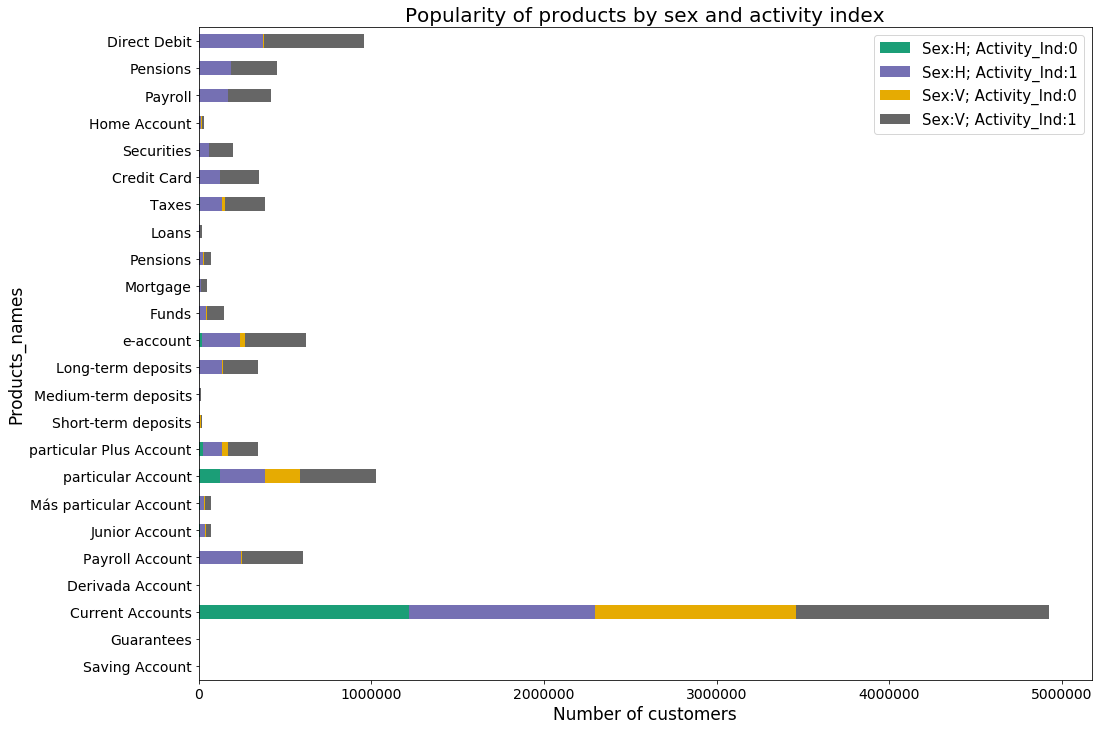

In [0]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='Dark2')
plt.title('Popularity of products by sex and activity index', fontsize=20) 
plt.xlabel('Number of customers', fontsize=17) 
plt.ylabel('Products_names', fontsize=17) 
plt.legend(["Sex:H; Activity_Ind:0", "Sex:H; Activity_Ind:1", "Sex:V; Activity_Ind:0", 
            "Sex:V; Activity_Ind:1"], prop={'size':15}) 

In [0]:
exclude = ["Current Accounts"]
df_a = df_a.T
df_a = df_a.drop(exclude, axis=1).T

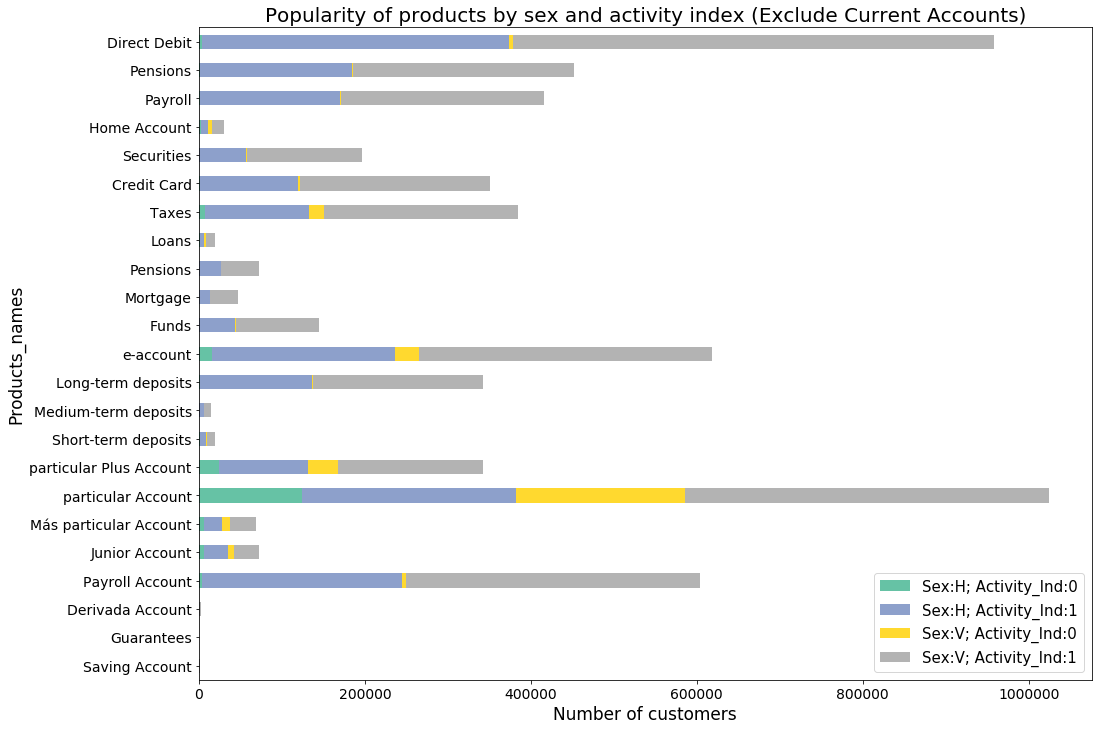

In [0]:
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='Set2')
plt.title('Popularity of products by sex and activity index (Exclude Current Accounts)', fontsize=20, color='black') 
plt.xlabel('Number of customers', fontsize=17, color='black') 
plt.ylabel('Products_names', fontsize=17, color='black') 
plt.legend(["Sex:H; Activity_Ind:0", "Sex:H; Activity_Ind:1", "Sex:V; Activity_Ind:0", 
            "Sex:V; Activity_Ind:1"], prop={'size':15})

In [0]:
df["tot_products"] = df.loc[:, "Saving Account":"Direct Debit"].sum(axis=1)
df["tot_products"]   = pd.to_numeric(df["tot_products"], errors="coerce") 

In [0]:
total=df["tot_products"].value_counts()
total=pd.DataFrame(total)
print(total)

      tot_products
1.0        3922935
2.0        1073441
0.0         883858
3.0         430284
4.0         248956
5.0         162555
6.0         120879
7.0          81815
8.0          44300
9.0          19980
10.0          7542
11.0          2623
12.0           668
13.0           140
14.0            17
15.0             7


In [0]:
count = df["Customer code"].count()
total["percentage"] = (total['tot_products']/count)*100
total

,tot_products,percentage
1.0,3922935,56.041929
2.0,1073441,15.334871
0.0,883858,12.626543
3.0,430284,6.146914
4.0,248956,3.556514
5.0,162555,2.322214
6.0,120879,1.726843
7.0,81815,1.168786
8.0,44300,0.632857
9.0,19980,0.285429


Text(0, 0.5, 'Number of Customers')

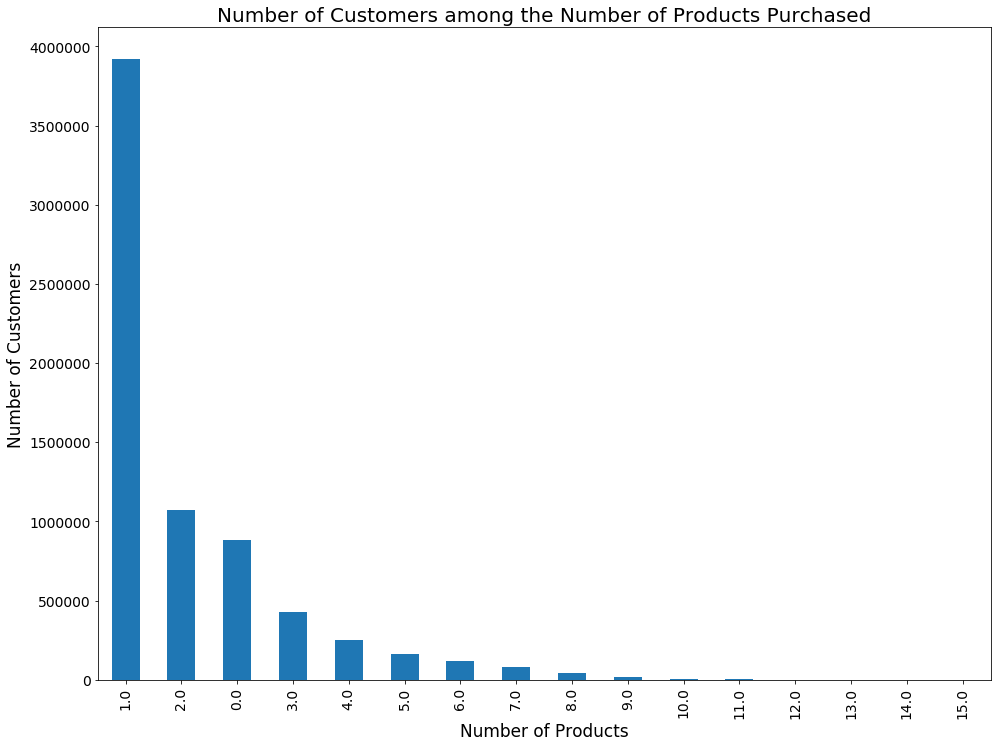

In [0]:
total["tot_products"].plot(kind='bar', fontsize=14, figsize=[16,12])
plt.title('Number of Customers among the Number of Products Purchased', fontsize=20, color='black') 
plt.xlabel('Number of Products', fontsize=17, color='black') 
plt.ylabel('Number of Customers', fontsize=17, color='black') 

In [0]:
df_a = (df.groupby(pd.cut(df["Gross income of the household"], [0,60000,120000,180000,240000, pd.np.inf], right=False))
                     .sum())
df_a=pd.DataFrame(df_a)

In [0]:
df_a = df_a.loc[:, "Saving Account":"Direct Debit"]
#df_a = df_a.T
df_a

,Saving Account,Guarantees,Current Accounts,Derivada Account,Payroll Account,Junior Account,Más particular Account,particular Account,particular Plus Account,Short-term deposits,...,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions,Direct Debit
Gross income of the household,,,,,,,,,,,,,,,,,,,,,
"[0.0, 60000.0)",67,6,768941,345,69397,5451,7977,95275,29058,2294,...,4814,4679,4236,36139,29889,13302,2377,46814.0,50397.0,116655
"[60000.0, 120000.0)",148,34,1758617,837,208535,22595,24128,322615,110722,6757,...,17017,19109,7461,120311,110971,53130,9168,143962.0,154896.0,334808
"[120000.0, 180000.0)",223,37,811844,657,129926,18282,13523,221222,75830,3655,...,10290,17133,2503,83829,80339,43147,7097,92546.0,99893.0,196189
"[180000.0, 240000.0)",146,67,349656,386,62733,9480,6678,113377,39166,1430,...,5001,10572,853,46142,41676,26449,3900,44447.0,48714.0,92935
"[240000.0, inf)",150,39,354945,354,59622,8057,5719,117711,40442,1147,...,4397,12371,923,54256,42187,30842,4713,39455.0,44831.0,93514


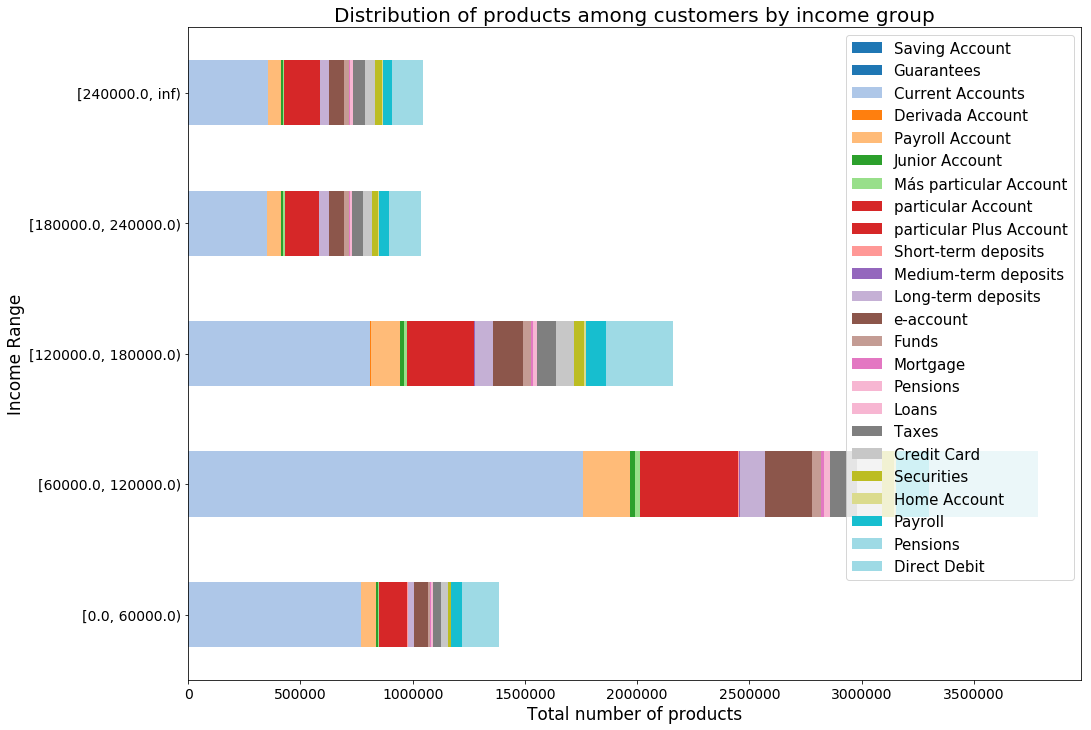

In [0]:
# Plot of product share for each income group
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='tab20')
plt.title('Distribution of products among customers by income group', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Income Range', fontsize=17, color='black') 
plt.legend(prop={'size':15}, loc=1) 

In [0]:
exclude = ["Current Accounts"]
df_a_1 = df_a.drop(exclude, axis=1)

df_a_1

,Saving Account,Guarantees,Derivada Account,Payroll Account,Junior Account,Más particular Account,particular Account,particular Plus Account,Short-term deposits,Medium-term deposits,...,Mortgage,Pensions,Loans,Taxes,Credit Card,Securities,Home Account,Payroll,Pensions,Direct Debit
Gross income of the household,,,,,,,,,,,,,,,,,,,,,
"[0.0, 60000.0)",67,6,345,69397,5451,7977,95275,29058,2294,1268,...,4814,4679,4236,36139,29889,13302,2377,46814.0,50397.0,116655
"[60000.0, 120000.0)",148,34,837,208535,22595,24128,322615,110722,6757,4823,...,17017,19109,7461,120311,110971,53130,9168,143962.0,154896.0,334808
"[120000.0, 180000.0)",223,37,657,129926,18282,13523,221222,75830,3655,3024,...,10290,17133,2503,83829,80339,43147,7097,92546.0,99893.0,196189
"[180000.0, 240000.0)",146,67,386,62733,9480,6678,113377,39166,1430,1610,...,5001,10572,853,46142,41676,26449,3900,44447.0,48714.0,92935
"[240000.0, inf)",150,39,354,59622,8057,5719,117711,40442,1147,1281,...,4397,12371,923,54256,42187,30842,4713,39455.0,44831.0,93514


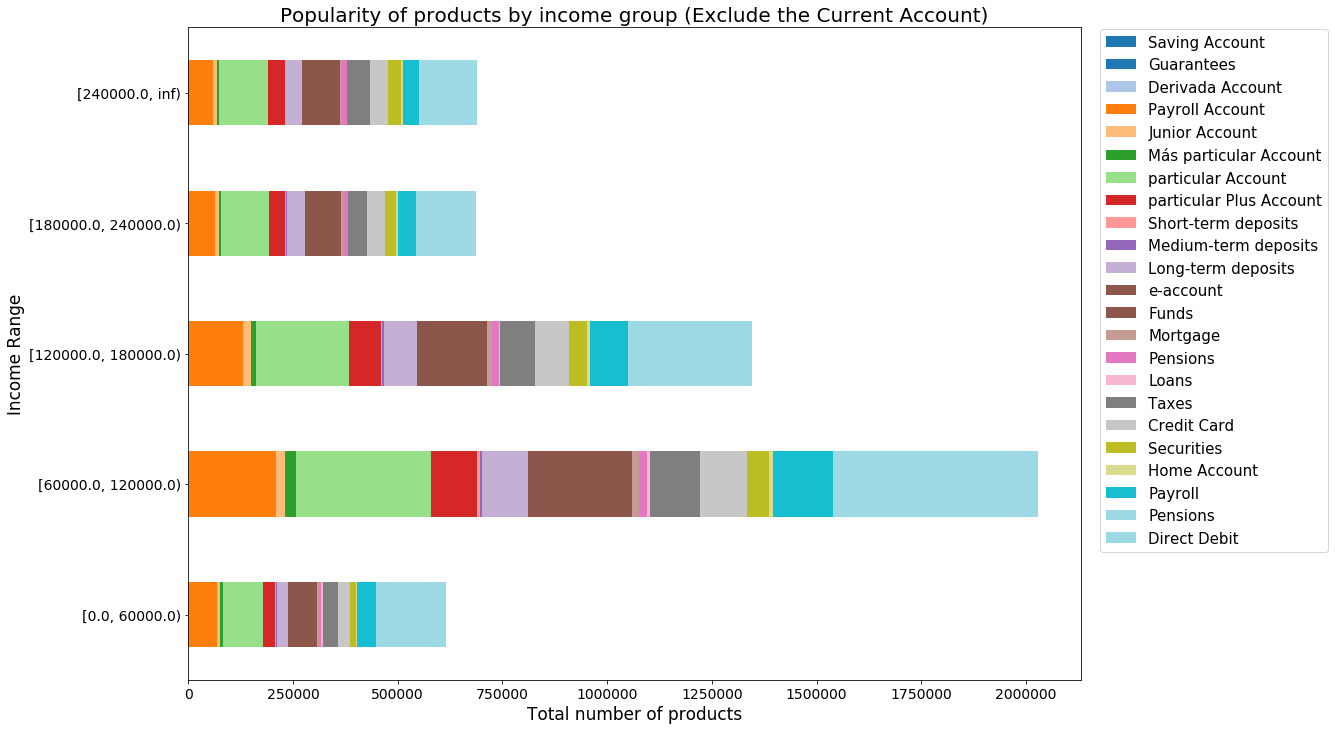

In [0]:
df_a_1.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='tab20')
plt.title('Popularity of products by income group (Exclude the Current Account)', fontsize=20, color='black') 
plt.xlabel('Total number of products', fontsize=17, color='black') 
plt.ylabel('Income Range', fontsize=17, color='black') 
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.1, prop={'size':15}) 

In [0]:
df_a = df.loc[:, ["segmentation"]].join(df.loc[:, "Saving Account":"Direct Debit"])

In [0]:
df_a = df_a.groupby("segmentation").agg("sum")
df_a = df_a.T

In [0]:
df_a.head()

segmentation,01 - TOP,02 - PARTICULARES,03 - UNIVERSITARIO
Saving Account,78.0,753.0,0.0
Guarantees,82.0,110.0,0.0
Current Accounts,190648.0,2470906.0,2211319.0
Derivada Account,600.0,2412.0,22.0
Payroll Account,99296.0,418618.0,86213.0


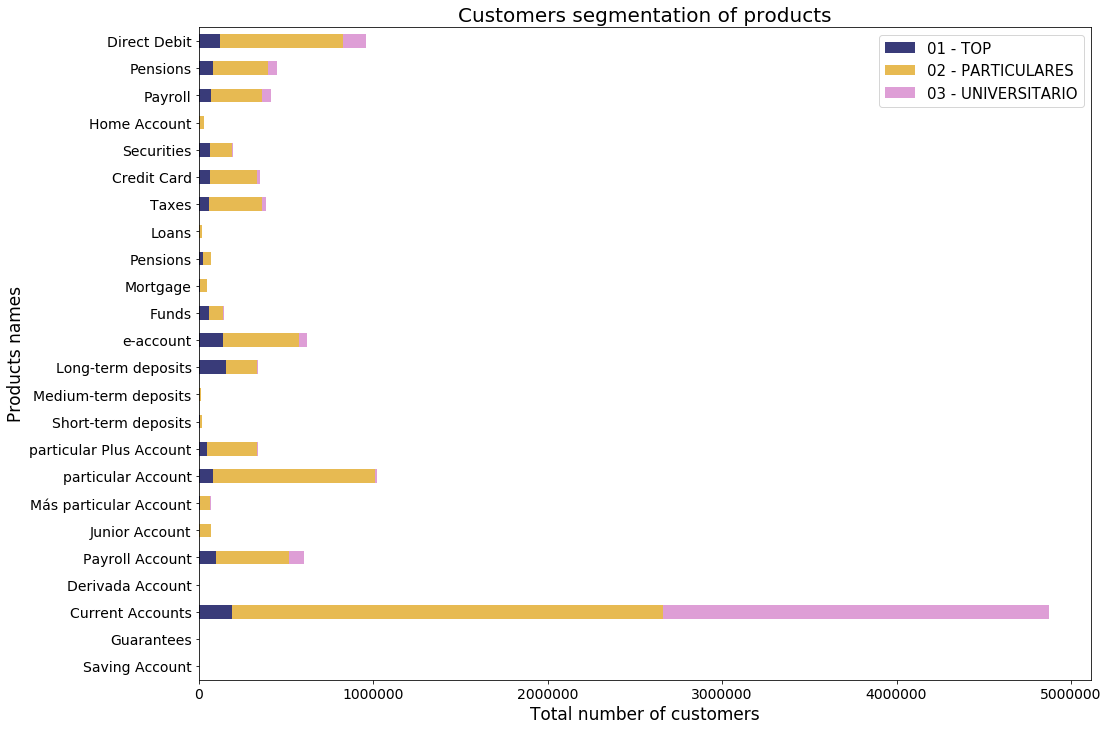

In [0]:
# Customers segment of each product
df_a.plot(kind='barh', stacked=True, fontsize=14, figsize=[16,12], colormap='tab20b')
plt.title('Customers segmentation of products', fontsize=20, color='black') 
plt.xlabel('Total number of customers', fontsize=17, color='black') 
plt.ylabel('Products names', fontsize=17, color='black') 
plt.legend(prop={'size':15}) 

In [0]:
df_1= df.loc[:, "Saving Account":"Direct Debit"].sum(axis=0)


In [0]:
df_1=pd.DataFrame(df_1)
df_1.columns=['Number of Customers']
df_1

,Number of Customers
Saving Account,831.0
Guarantees,192.0
Current Accounts,4929403.0
Derivada Account,3038.0
Payroll Account,604437.0
Junior Account,72728.0
Más particular Account,69057.0
particular Account,1025012.0
particular Plus Account,342786.0
Short-term deposits,19424.0


In [0]:
df_1['Percentage']=(df_1['Number of Customers']/df_1['Number of Customers'].sum())*100



In [0]:
df_1

,Number of Customers,Percentage
Saving Account,831.0,0.007476
Guarantees,192.0,0.001727
Current Accounts,4929403.0,44.345438
Derivada Account,3038.0,0.027330
Payroll Account,604437.0,5.437580
Junior Account,72728.0,0.654269
Más particular Account,69057.0,0.621244
particular Account,1025012.0,9.221118
particular Plus Account,342786.0,3.083740
Short-term deposits,19424.0,0.174740


Text(0, 0.5, 'Product Names')

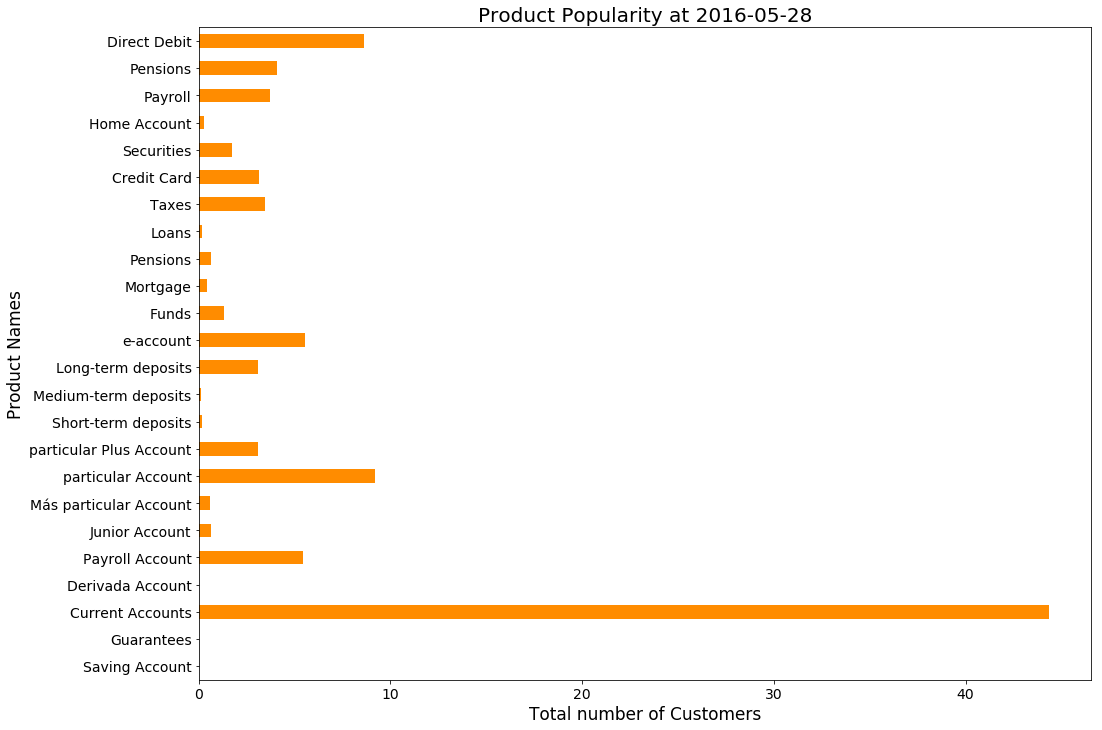

In [0]:
df_1['Percentage'].plot(kind='barh',  fontsize=14, figsize=[16,12],color='darkorange')
plt.title('Product Popularity at 2016-05-28', fontsize=20, color='black') 
plt.xlabel('Total number of Customers', fontsize=17, color='black') 
plt.ylabel('Product Names', fontsize=17, color='black') 


In [0]:
df.columns

Index(['Unnamed: 0', 'fecha_dato', 'Customer code', 'Employee index',
       'Customer's Country residence', 'Customer's sex', 'Age', 'fecha_alta',
       'New customer Index', 'Customer seniority', 'First/Primary',
       'Customer type at the beginning of the month',
       'Customer relation type at the beginning of the month',
       'Residence index', 'Foreigner index', 'channel', 'Deceased index',
       'Addres type', 'Province code', 'Province name', 'Activity index',
       'Gross income of the household', 'segmentation', 'Saving Account',
       'Guarantees', 'Current Accounts', 'Derivada Account', 'Payroll Account',
       'Junior Account', 'Más particular Account', 'particular Account',
       'particular Plus Account', 'Short-term deposits',
       'Medium-term deposits', 'Long-term deposits', 'e-account', 'Funds',
       'Mortgage', 'Pensions', 'Loans', 'Taxes', 'Credit Card', 'Securities',
       'Home Account', 'Payroll', 'Pensions', 'Direct Debit', 'tot_products'],
   

In [0]:
Others=df_1[df_1['Percentage']<=1]['Percentage']
Other=Others.sum()
Other=pd.Series(Other)
Others)

Series([], Name: Percentage, dtype: float64)


In [0]:
df_2=df_1[df_1['Percentage'] > 1]['Percentage']
df_3=df_2.append(Other)
df_3

Current Accounts           44.345438
Payroll Account             5.437580
particular Account          9.221118
particular Plus Account     3.083740
Long-term deposits          3.078603
e-account                   5.569535
Funds                       1.301395
Taxes                       3.464761
Credit Card                 3.152308
Securities                  1.765405
Payroll                     3.745205
Pensions                    4.065818
Direct Debit                8.628077
0                           3.141018
dtype: float64

In [0]:
df_1=pd.DataFrame(df_3)
df_1.columns={'Percentage'}
df_1

,Percentage
Current Accounts,44.345438
Payroll Account,5.437580
particular Account,9.221118
particular Plus Account,3.083740
Long-term deposits,3.078603
e-account,5.569535
Funds,1.301395
Taxes,3.464761
Credit Card,3.152308
Securities,1.765405


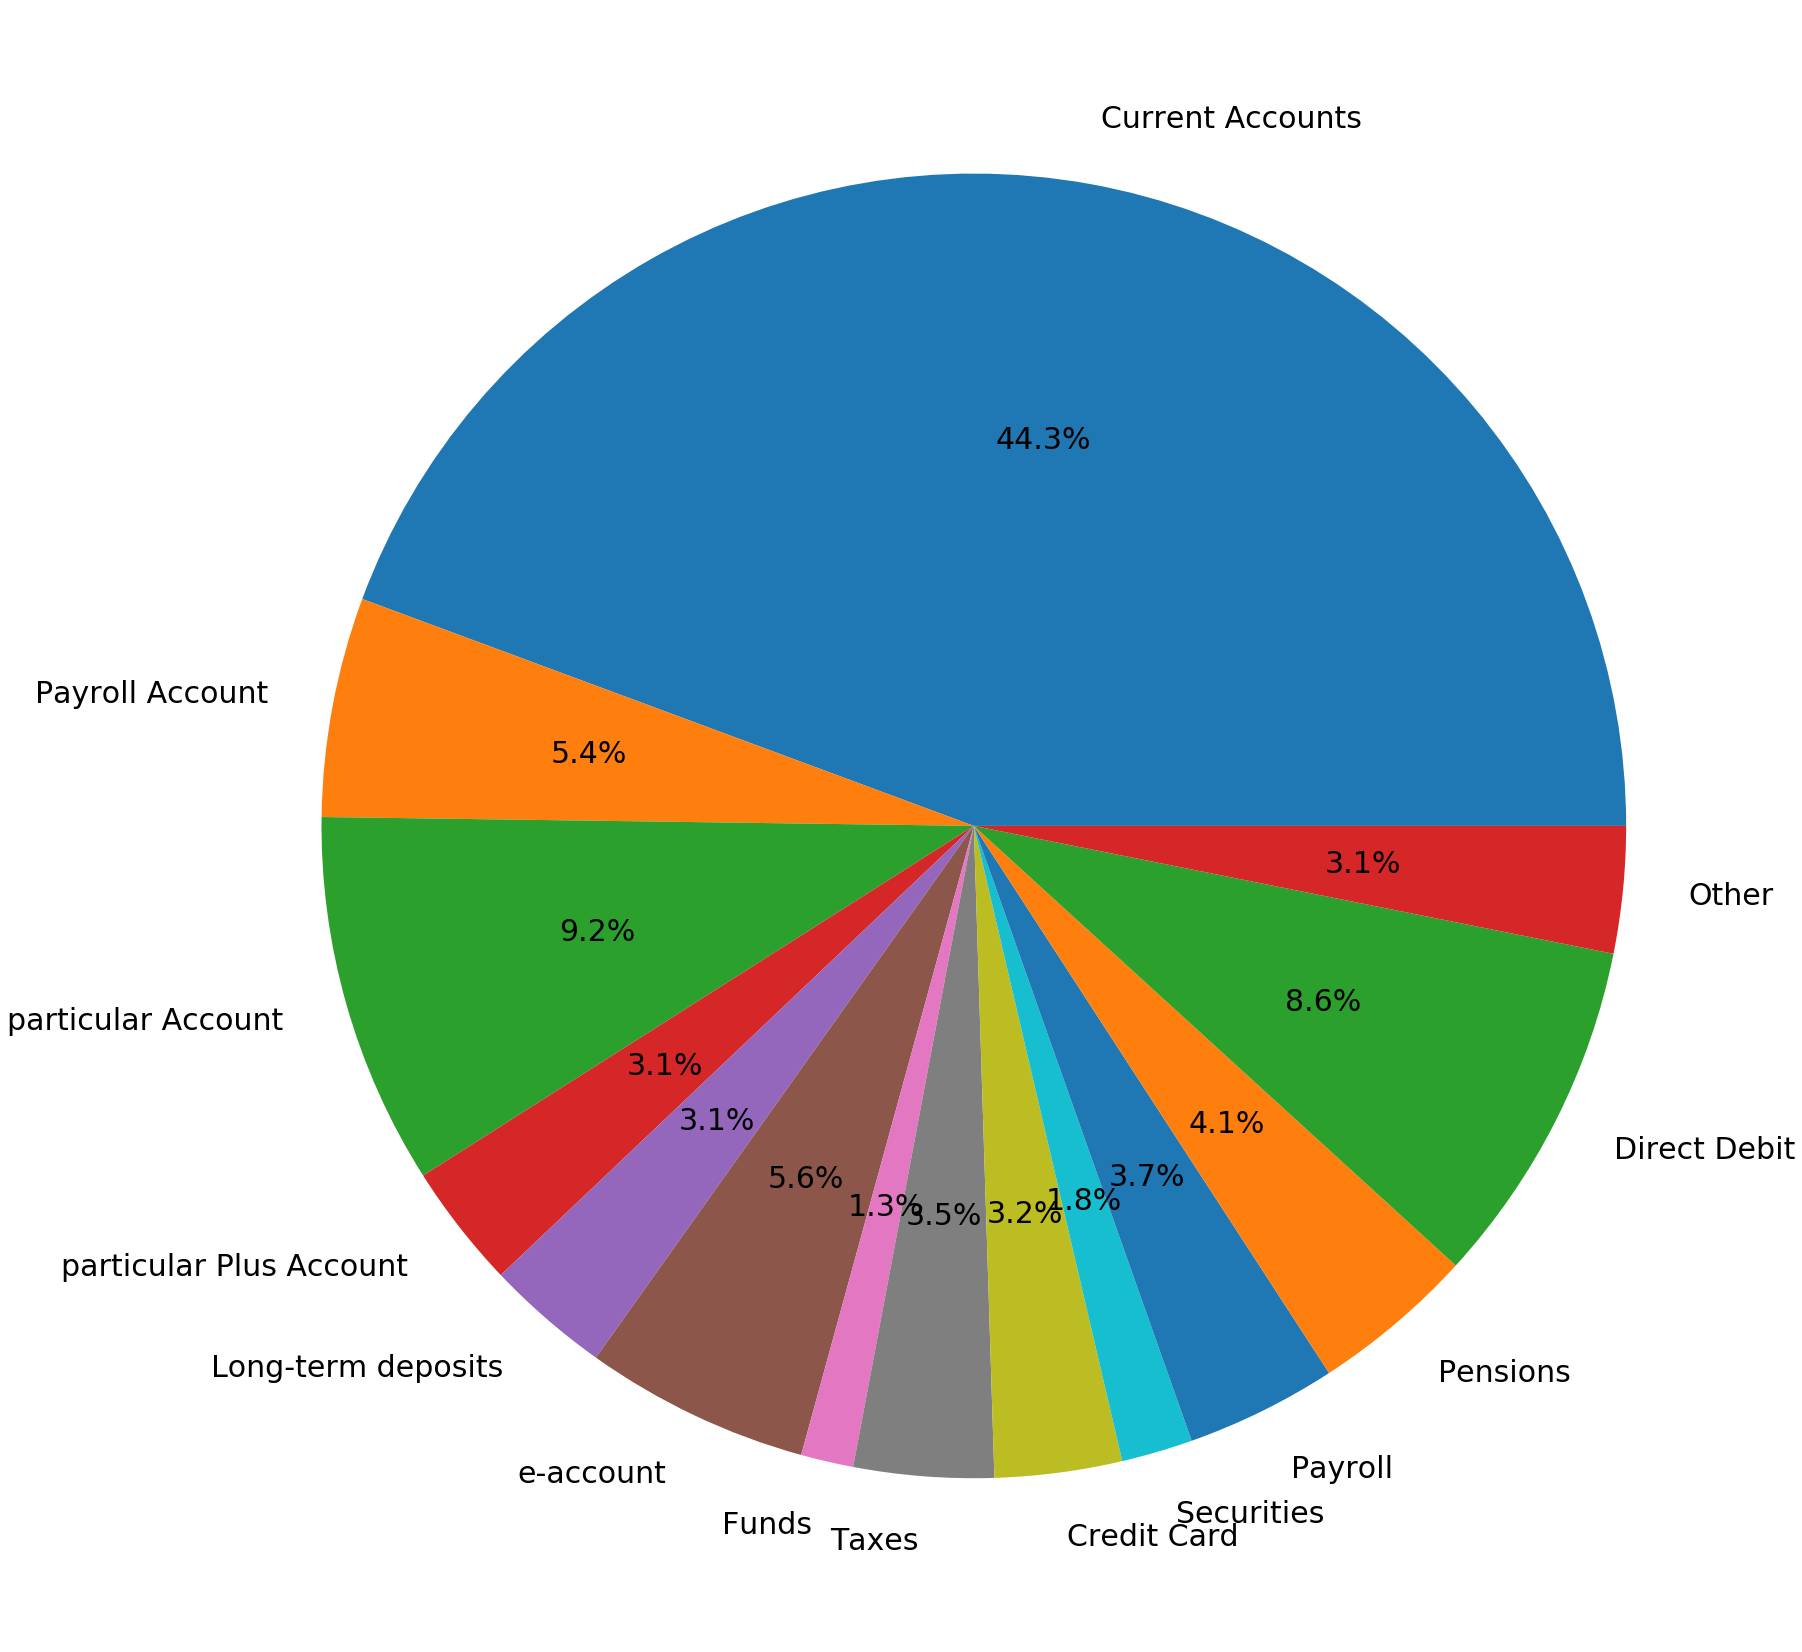

In [0]:
labels=['Current Accounts', 'Payroll Account', 'particular Account',
       'particular Plus Account',  'Long-term deposits', 'e-account', 'Funds','Taxes', 'Credit Card', 'Securities',
       'Payroll', 'Pensions', 'Direct Debit','Other']
df_1['Percentage'].plot(figsize=(30,30))
plt.rcParams['font.size'] = 30.0
plt.pie(df_1['Percentage'],labels=labels,
autopct='%1.1f%%')
plt.show()